<a href="https://colab.research.google.com/github/Z5-05/study_third_sem/blob/main/ml/Mephi_ML8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
!pip install ClusterEnsembles

ERROR: Could not find a version that satisfies the requirement ClusterEnsembles (from versions: none)
ERROR: No matching distribution found for ClusterEnsembles


In [69]:
# !pip install ucimlrepo

In [70]:
# from ucimlrepo import fetch_ucirepo

# # fetch dataset
# wine = fetch_ucirepo(id=109)

# # data (as pandas dataframes)
# X = wine.data.features
# y = wine.data.targets

In [71]:
import re
import requests
import json
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import sparse
sns.set_theme(style="ticks")

from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import StackingClassifier
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore")

In [72]:
X.fillna(0, inplace=True)

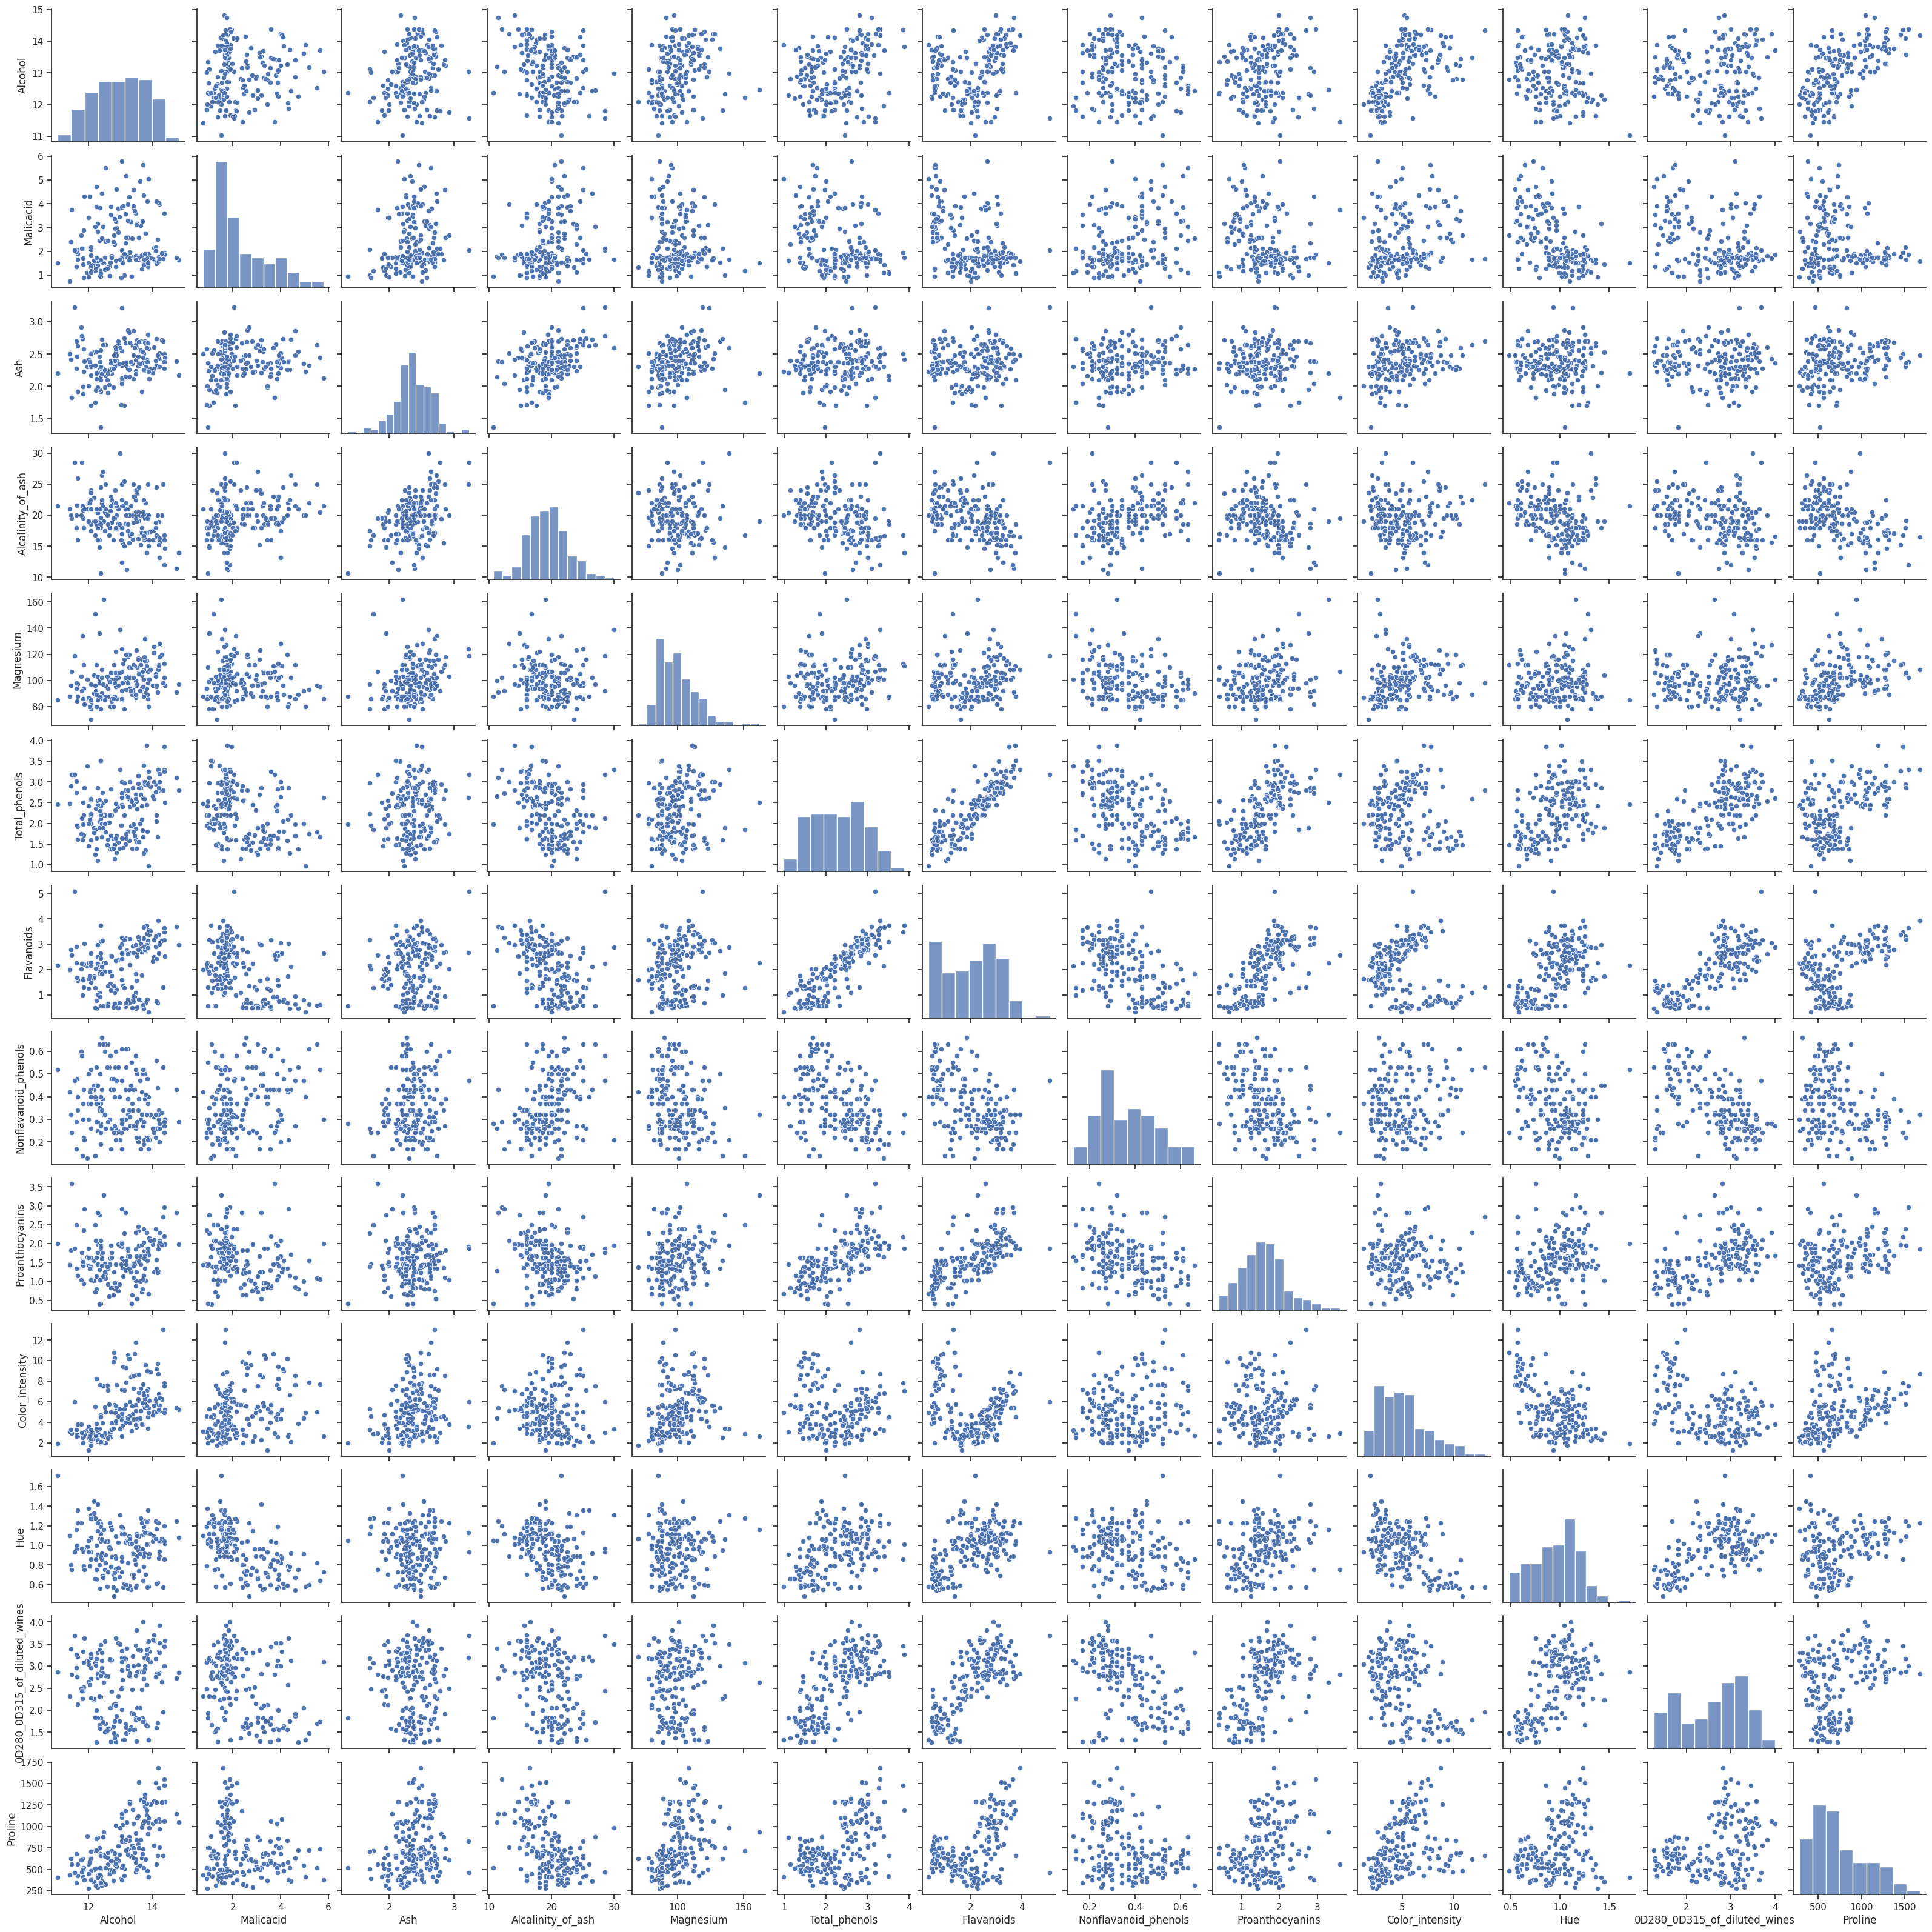

In [73]:
sns.pairplot(X)
plt.show()

In [74]:
for i in range(2, 11):
  y = GaussianMixture(n_components=i, random_state=0).fit_predict(X)
  silhouette = metrics.silhouette_score(X, y, metric='euclidean')
  dbs = metrics.davies_bouldin_score(X, y)
  print(f"Silhouette = {silhouette}, davies_bouldin_score = {dbs}")
# лучше - 8
y = GaussianMixture(n_components=8, random_state=0).fit_predict(X)

Silhouette = 0.5643242782521394, davies_bouldin_score = 0.5709386400625596
Silhouette = 0.28326046005723704, davies_bouldin_score = 0.8399962843528668
Silhouette = 0.20453567752525378, davies_bouldin_score = 1.3028305377349976
Silhouette = 0.24069558450605774, davies_bouldin_score = 0.8318624523816357
Silhouette = 0.45699899908254843, davies_bouldin_score = 0.5396181883669009
Silhouette = 0.46882628384974845, davies_bouldin_score = 0.5317733705816498
Silhouette = 0.4772952726977042, davies_bouldin_score = 0.5476261812520682
Silhouette = 0.46659669715156576, davies_bouldin_score = 0.5727126295859057
Silhouette = 0.4799269217030181, davies_bouldin_score = 0.5702827330783925


In [75]:
results = []
for i in ['ward', 'complete', 'average', 'single']:
  results.append(AgglomerativeClustering(n_clusters=8, linkage=i).fit(X).labels_)
results = np.vstack(results)

In [76]:
n_bcs, len_bcs = results.shape
M = np.zeros((len_bcs, len_bcs))
m = np.zeros_like(M)

for bc in results:
  for i, elem_bc in enumerate(bc):
    m[i] = np.where(elem_bc == bc, 1, 0)
  M += m

M /= n_bcs
M = sparse.csr_matrix(M)

In [77]:
labels = AgglomerativeClustering(n_clusters=8).fit(M.toarray()).labels_

In [78]:
silhouette = metrics.silhouette_score(X, labels, metric='euclidean')
dbs = metrics.davies_bouldin_score(X, labels)
print(f"Silhouette = {silhouette}, davies_bouldin_score = {dbs}")

Silhouette = 0.4574605790837341, davies_bouldin_score = 0.5062758806415995
